Project Title: Predicting Student Performance

Group Number: 83

Student Names and Reg Numbers:                                                                                 
        Nifras M.J.M.  - EG/2020/4366                                                               
        Senapathy J.D. - EG/2020/4200

Linear Regression Algorithm

In [377]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [378]:
#Open the dataset
#and print the first 10 values of the data set
# Change the path according to your computer the dataset also shares the same path as the main code

df = pd.read_csv('/Users/Nifras MJM/Desktop/ML Project/exams.csv')

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [379]:
#checking if there is any null values exists in the dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [380]:
#in our dataset there are some columns which only have the catagoriacl data 
#so we used the label encoder to change the categorical data to numerical data
le = LabelEncoder()

#here we change every catagorical data in to numerical data using labelencoder

df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86
5,1,2,5,1,1,68,57,54
6,0,4,0,1,1,82,83,80
7,0,1,5,1,1,46,61,58
8,1,2,5,1,1,80,75,73
9,0,2,1,1,0,57,69,77


<Axes: >

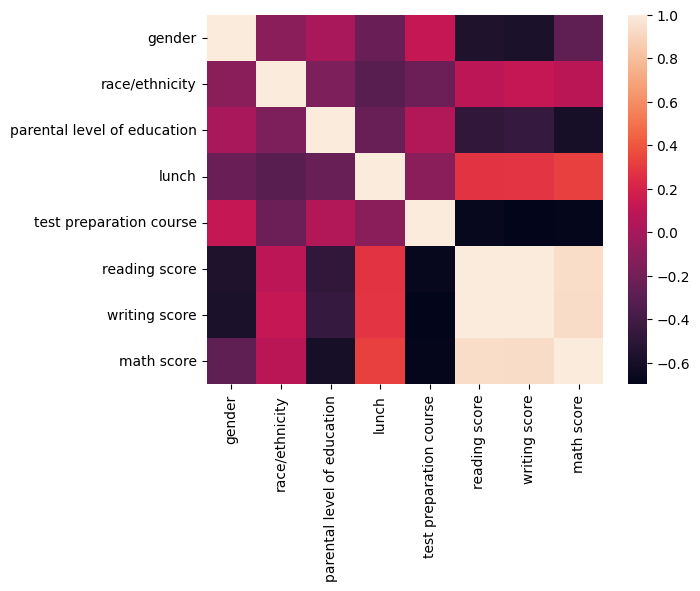

In [381]:
# Visualize the correlation matrix using seaborn

correlation_matrix = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score', 'math score']].corr()

sns.heatmap(correlation_matrix.corr())

<Axes: xlabel='parental level of education', ylabel='count'>

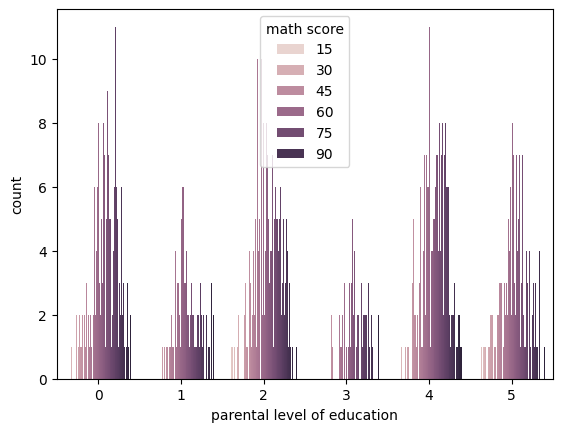

In [382]:
#plot of Count vs Parental level of education based on maths score

sns.countplot(x='parental level of education',data = df, hue='math score')

<Axes: xlabel='test preparation course', ylabel='count'>

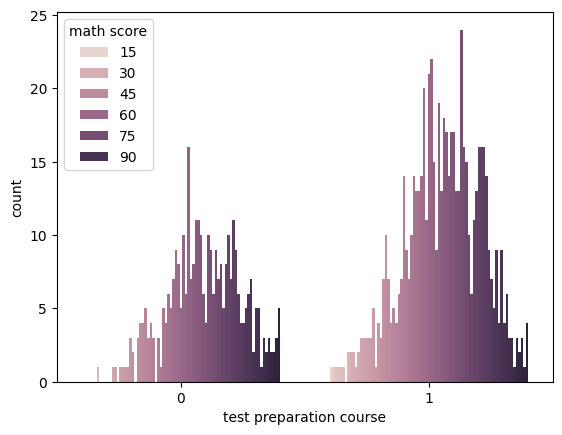

In [383]:
#plot of Count vs test preparation course based on maths score

sns.countplot(x='test preparation course',data = df, hue='math score')

<Axes: xlabel='gender', ylabel='count'>

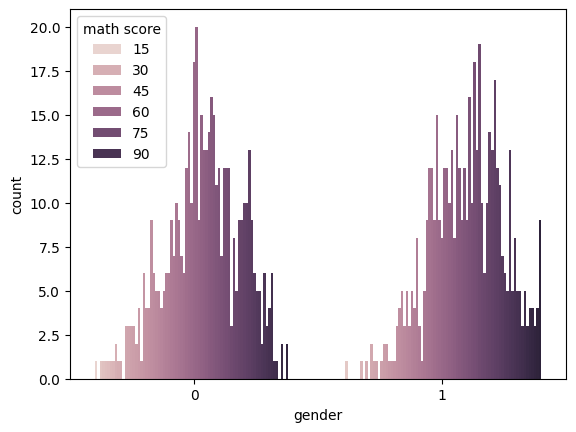

In [384]:
#plot of Count vs gender based on maths score

sns.countplot(x='gender',data = df, hue='math score')

<Axes: xlabel='race/ethnicity', ylabel='count'>

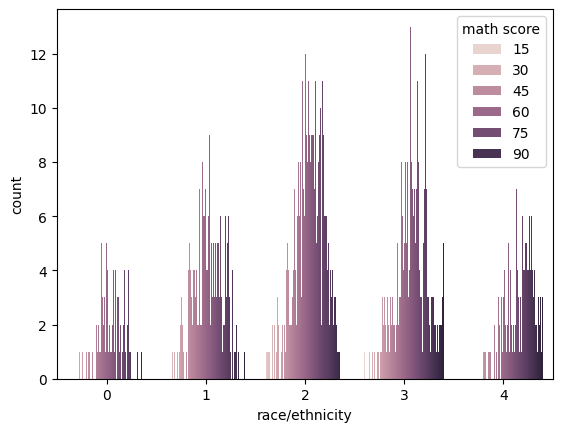

In [385]:
#plot of Count vs race/ethnicity based on maths score

sns.countplot(x='race/ethnicity',data = df, hue='math score')

<Axes: xlabel='lunch', ylabel='count'>

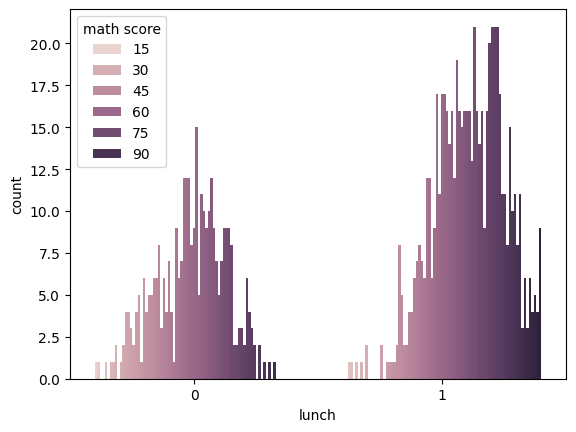

In [386]:
#plot of Count vs lunch based on maths score

sns.countplot(x='lunch',data = df, hue='math score')

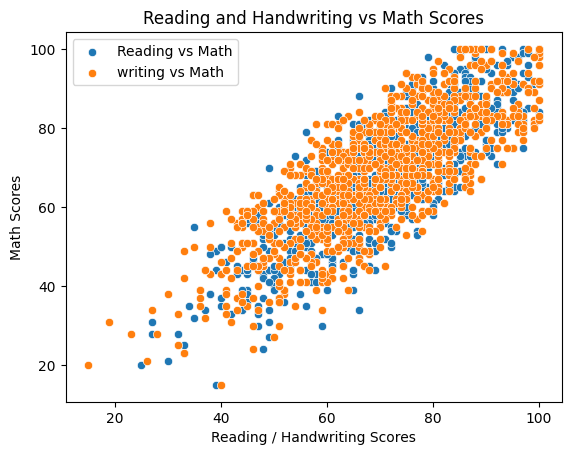

In [387]:
#plot of Count vs reading score and writing score based on maths score

sns.scatterplot(x='reading score', y='math score', data=df, label='Reading vs Math')
sns.scatterplot(x='writing score', y='math score', data=df, label='writing vs Math')

plt.xlabel('Reading / Handwriting Scores')
plt.ylabel('Math Scores')
plt.title('Reading and Handwriting vs Math Scores')

plt.legend()
plt.show()

In [388]:
# Here we set our targeed variable as math score and 
# we drop 2 columns which are not much related according to the correlation matrix

y =  df['math score']

x = df.drop(['math score','parental level of education','test preparation course'], axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.6,random_state=0)

In [389]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [390]:
# To check the accuracy we do this 
# we are getting a accuracy which is more then 80%

y_pred = lr.predict(x_test)

accuracy = metrics.r2_score(y_test,y_pred)

print(accuracy)

0.8486947153829749


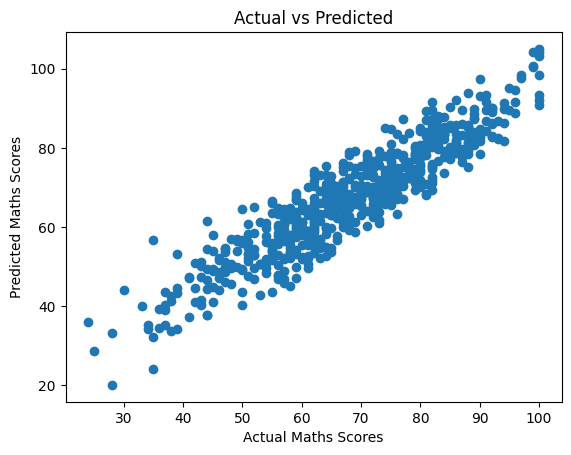

In [391]:
# Scatter plot of predicted vs actual values for the linear regression model
# This also shows that most of the time the actual and predicted values are nearly same

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Maths Scores")
plt.ylabel("Predicted Maths Scores")
plt.title("Actual vs Predicted")
plt.show()

K-Nearest Neighbors Algorithm

In this part of code we use KNN algorithm to make our predictions

In [392]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [393]:
# Open the dataset
# Change the path according to your computer the dataset also shares the same path as the main code

s_performance = pd.read_csv('/Users/Nifras MJM/Desktop/ML Project/exams.csv')

s_performance.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [394]:
# Extract all other features and target variable
# As per the correlation matrix the parental level of education	and test preparation course	are the less correleated
# columns in the data set so we only consider other columns and avoid the both of them

X = s_performance[['gender', 'race/ethnicity', 'lunch','reading score', 'writing score']]
y = s_performance['math score']

In [395]:
# Here we Separate numerical and categorical features for our ease
# As per the correlation matrix the parental level of education	and test preparation course	are the less correleated

categorical_features = ['gender', 'race/ethnicity', 'lunch']
numerical_features = ['reading score', 'writing score']

In [396]:
# This is another method of preprocessing where we Create a preprocessor using ColumnTransformer and SimpleImputer
# we use ordinalencodder to change catagorical data into integers
# SimpleImputer to fill missing values in numerical features with mean value but in our dataset no missing value exist

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_features),
        ('num', SimpleImputer(strategy='mean'), numerical_features)
    ])

In [397]:
# Create a pipeline to chain the preprocessor and the model

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', knn_model)])

In [398]:
# we put _k here because this is only for Knn model
# This is same as linear regression Split the data into training and testing sets

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X, y, test_size=0.5, random_state=0)

In [399]:
#printing the preprocessed dataset
#here we convert the preprocessed data into a dataframe(df) for our easiness

X_train_prepro = model.named_steps['preprocessor'].fit_transform(X_train_k)

prepro_df = pd.DataFrame(X_train_prepro, columns=categorical_features + numerical_features)

print(prepro_df.head())


   gender  race/ethnicity  lunch  reading score  writing score
0     0.0             1.0    1.0           73.0           72.0
1     0.0             3.0    0.0           98.0           94.0
2     0.0             3.0    1.0           95.0          100.0
3     1.0             2.0    1.0           89.0           83.0
4     0.0             3.0    0.0           66.0           66.0


In [401]:
# Create a KNN Regressor model and add k value(n_neighbors)

knn_model = KNeighborsClassifier(n_neighbors=9) 

In [402]:
# Fiting the model

model.fit(X_train_k, y_train_k)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  ['gender', 'race/ethnicity',
                                                   'lunch']),
                                                 ('num', SimpleImputer(),
                                                  ['reading score',
                                                   'writing score'])])),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [403]:
# To Make predictions on the test set we create the predictions

predictions = model.predict(X_test_k)

In [404]:
# Here we Evaluate the model

# This will Calculates the mean squared error (MSE)
# between the true target values (y_test) and the predicted values (predictions)
mse = mean_squared_error(y_test_k, predictions)

r2 = r2_score(y_test_k, predictions)

# print Mean Squared Error

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 180.588
R-squared: 0.17680908906915815


In [405]:
# We create a new dataframe or a row that look same as our dataset for check our prediction model
# To make predictions about the maths score
# Let this as our new student's data

new_data = pd.DataFrame({
    'gender': ['female'],
    'race/ethnicity': ['group C'],
    'lunch': ['standard'],
    'reading score': [89],
    'writing score': [69]
})

# Make predictions using the trained model
predictions = model.predict(new_data)

# Display the predicted math score for the new student
print(f'Predicted Math Score for the New Student: {predictions[0]}')

Predicted Math Score for the New Student: 84


In [408]:
# # Scatter plot of predicted vs actual values for the Knn model

# # Create a KNN model
# knn_model = KNeighborsClassifier(n_neighbors=9)

# # Train the model
# knn_model.fit(X_train_k, y_train_k)

# y_pred_k = knn_model.predict(X_test_k)


# plt.scatter(y_test_k, y_pred_k)

# plt.xlabel("Actual Maths Scores")
# plt.ylabel("Predicted Maths Scores")
# plt.title("Actual vs Predicted")
# plt.show()